In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import gc
import time
import seaborn as sns; sns.set()

import os 
# Disable warnings, set Matplotlib inline plotting and load Pandas package
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
#pd.options.display.mpl_style = 'default'
from datetime import datetime
import numpy as np
from datetime import datetime, timedelta
from pytz import timezone
from dateutil import tz
import geojson
import geopandas as gpd
from fiona.crs import from_epsg
import os, json
from shapely.geometry import shape, Point, Polygon, MultiPoint
%matplotlib inline
import matplotlib.pyplot as plt
from geopandas.tools import sjoin

import matplotlib.cm as cm

import folium
import shapely.geometry

from branca.colormap import  linear
import json
import branca.colormap as cm

import matplotlib.colors as colors
%matplotlib inline

import networkx as nx
import pickle
import osmnx as ox

ox.config(log_console=True, use_cache=True)
ox.__version__

'1.0.1'

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/result-mtl/STL_training.pkl
/kaggle/input/result-mtl/flow_HA_MAE.pkl
/kaggle/input/result-mtl/noDense_RMSE.pkl
/kaggle/input/result-mtl/noDense_MAE.pkl
/kaggle/input/result-mtl/flow_HA_RMSE.pkl
/kaggle/input/result-mtl/STL_LSTM_MAE.pkl
/kaggle/input/result-mtl/noGCN_RMSE.pkl
/kaggle/input/result-mtl/vel_HA_RMSE.pkl
/kaggle/input/result-mtl/MTL_GRU_RMSE.pkl
/kaggle/input/result-mtl/MTL_GCN_GRU_RMSE.pkl
/kaggle/input/result-mtl/MTL_GCN_GRU_MAE.pkl
/kaggle/input/result-mtl/STL_GCN_GRU_RMSE.pkl
/kaggle/input/result-mtl/STL_GRU_RMSE.pkl
/kaggle/input/result-mtl/MTL_training.pkl
/kaggle/input/result-mtl/STL_GCN_GRU_MAE.pkl
/kaggle/input/result-mtl/noAdd_RMSE.pkl
/kaggle/input/result-mtl/noGCN_MAE.pkl
/kaggle/input/result-mtl/STL_GCN_RMSE.pkl
/kaggle/input/result-mtl/MTL_GRU_MAE.pkl
/kaggle/input/result-mtl/STL_GRU_MAE.pkl
/kaggle/input/result-mtl/unique_STL_GCN_GRU_RMSE.pkl
/kaggle/input/result-mtl/STL_LSTM_RMSE.pkl
/kaggle/input/result-mtl/noAdd_MAE.pkl
/kaggle/input/result-mt

In [3]:
# HA model (Baseline)

# rmse
path = '/kaggle/input/result-mtl/flow_HA_RMSE.pkl'

with open(path,'rb') as f:
        flow_HA_rmse_list = pickle.load(f)

# mae
path = '/kaggle/input/result-mtl/flow_HA_MAE.pkl'

with open(path,'rb') as f:
        flow_HA_mae_list = pickle.load(f)
        
        
# rmse
path = '/kaggle/input/result-mtl/vel_HA_RMSE.pkl'

with open(path,'rb') as f:
        vel_HA_rmse_list = pickle.load(f)

# mae
path = '/kaggle/input/result-mtl/vel_HA_MAE.pkl'

with open(path,'rb') as f:
        vel_HA_mae_list = pickle.load(f)

In [4]:
HA_rmse_flow = [rmse for i, rmse in enumerate(flow_HA_rmse_list)]
HA_rmse_vel = [rmse for i, rmse in enumerate(vel_HA_rmse_list)]

HA_mae_flow = [mae for i, mae in enumerate(flow_HA_mae_list)]
HA_mae_vel = [mae for i, mae in enumerate(vel_HA_mae_list)]

In [5]:
# MTL GCN GRU model (Best model based on attention)

# rmse
path = '/kaggle/input/result-mtl/MTL_GCN_GRU_RMSE.pkl'

with open(path,'rb') as f:
        rmse_list = pickle.load(f)

# mae
path = '/kaggle/input/result-mtl/MTL_GCN_GRU_MAE.pkl'

with open(path,'rb') as f:
        mae_list = pickle.load(f)

In [6]:
MTL_rmse_flow = [rmse[:,:5795] for i, rmse in enumerate(rmse_list)]
MTL_rmse_vel = [rmse[:,5795:] for i, rmse in enumerate(rmse_list)]

MTL_mae_flow = [mae[:,:5795] for i, mae in enumerate(mae_list)]
MTL_mae_vel = [mae[:,5795:] for i, mae in enumerate(mae_list)]

In [7]:
# STL GCN GRU model 

# rmse
path = '/kaggle/input/result-mtl/STL_GCN_GRU_RMSE.pkl'

with open(path,'rb') as f:
        STL_rmse_list = pickle.load(f)

# mae
path = '/kaggle/input/result-mtl/STL_GCN_GRU_MAE.pkl'

with open(path,'rb') as f:
        STL_mae_list = pickle.load(f)

In [8]:
STL_rmse_flow = [rmse[:,:5795] for i, rmse in enumerate(STL_rmse_list)]
STL_rmse_vel = [rmse[:,5795:] for i, rmse in enumerate(STL_rmse_list)]

STL_mae_flow = [mae[:,:5795] for i, mae in enumerate(STL_mae_list)]
STL_mae_vel = [mae[:,5795:] for i, mae in enumerate(STL_mae_list)]

In [9]:
# GCN GRU model for augmented matrix 

# rmse
path = '/kaggle/input/result-mtl/unique_STL_GCN_GRU_RMSE.pkl'

with open(path,'rb') as f:
        unique_STL_rmse_list = pickle.load(f)

# mae
path = '/kaggle/input/result-mtl/unique_STL_GCN_GRU_MAE.pkl'

with open(path,'rb') as f:
        unique_STL_mae_list = pickle.load(f)

In [10]:
unique_STL_rmse_flow = [rmse[:,:5795] for i, rmse in enumerate(unique_STL_rmse_list)]
unique_STL_rmse_vel = [rmse[:,5795:] for i, rmse in enumerate(unique_STL_rmse_list)]

unique_STL_mae_flow = [mae[:,:5795] for i, mae in enumerate(unique_STL_mae_list)]
unique_STL_mae_vel = [mae[:,5795:] for i, mae in enumerate(unique_STL_mae_list)]

In [11]:
# MTL GRU model  

# rmse
path = '/kaggle/input/result-mtl/MTL_GRU_RMSE.pkl'

with open(path,'rb') as f:
        MTL_GRU_rmse_list = pickle.load(f)

# mae
path = '/kaggle/input/result-mtl/MTL_GRU_MAE.pkl'

with open(path,'rb') as f:
        MTL_GRU_mae_list = pickle.load(f)

In [12]:
MTL_GRU_rmse_flow = [rmse[:,:5795] for i, rmse in enumerate(MTL_GRU_rmse_list)]
MTL_GRU_rmse_vel = [rmse[:,5795:] for i, rmse in enumerate(MTL_GRU_rmse_list)]

MTL_GRU_mae_flow = [mae[:,:5795] for i, mae in enumerate(MTL_GRU_mae_list)]
MTL_GRU_mae_vel = [mae[:,5795:] for i, mae in enumerate(MTL_GRU_mae_list)]

In [13]:
# STL GRU model  

# rmse
path = '/kaggle/input/result-mtl/STL_GRU_RMSE.pkl'

with open(path,'rb') as f:
        STL_GRU_rmse_list = pickle.load(f)

# mae
path = '/kaggle/input/result-mtl/STL_GRU_MAE.pkl'

with open(path,'rb') as f:
        STL_GRU_mae_list = pickle.load(f)

In [14]:
STL_GRU_rmse_flow = [rmse[:,:5795] for i, rmse in enumerate(STL_GRU_rmse_list)]
STL_GRU_rmse_vel = [rmse[:,5795:] for i, rmse in enumerate(STL_GRU_rmse_list)]

STL_GRU_mae_flow = [mae[:,:5795] for i, mae in enumerate(STL_GRU_mae_list)]
STL_GRU_mae_vel = [mae[:,5795:] for i, mae in enumerate(STL_GRU_mae_list)]

In [15]:
# STL LSTM model  

# rmse
path = '/kaggle/input/result-mtl/STL_LSTM_RMSE.pkl'

with open(path,'rb') as f:
        STL_LSTM_rmse_list = pickle.load(f)

# mae
path = '/kaggle/input/result-mtl/STL_LSTM_MAE.pkl'

with open(path,'rb') as f:
        STL_LSTM_mae_list = pickle.load(f)

In [16]:
STL_LSTM_rmse_flow = [rmse[:,:5795] for i, rmse in enumerate(STL_LSTM_rmse_list)]
STL_LSTM_rmse_vel = [rmse[:,5795:] for i, rmse in enumerate(STL_LSTM_rmse_list)]

STL_LSTM_mae_flow = [mae[:,:5795] for i, mae in enumerate(STL_LSTM_mae_list)]
STL_LSTM_mae_vel = [mae[:,5795:] for i, mae in enumerate(STL_LSTM_mae_list)]

# Traffic FLOW

### Total RMSE

In [17]:
HA_rmse = np.mean(HA_rmse_flow)
std_HA_rmse = np.std(HA_rmse_flow)

MTL_rmse = np.mean(MTL_rmse_flow)
std_MTL_rmse = np.std(MTL_rmse_flow)

STL_rmse = np.mean(STL_rmse_flow)
std_STL_rmse = np.std(STL_rmse_flow)

unique_STL_rmse = np.mean(unique_STL_rmse_flow)
unique_std_STL_rmse = np.std(unique_STL_rmse_flow)

MTL_GRU_rmse = np.mean(MTL_GRU_rmse_flow)
std_MTL_GRU_rmse = np.std(MTL_GRU_rmse_flow)

STL_GRU_rmse = np.mean(STL_GRU_rmse_flow)
std_STL_GRU_rmse = np.std(STL_GRU_rmse_flow)

STL_LSTM_rmse = np.mean(STL_LSTM_rmse_flow)
std_STL_LSTM_rmse = np.std(STL_LSTM_rmse_flow)



print(' HA RMSE '+str(HA_rmse)+' +-'+str(std_HA_rmse))
print('')

print(' AST-MTL RMSE '+str(MTL_rmse)+' +-'+str(std_MTL_rmse))
print('')

print(' STL GCN GRU RMSE '+str(STL_rmse)+' +-'+str(std_STL_rmse))
print('')

print(' GCN GRU RMSE with augmented matrix '+str(unique_STL_rmse)+' +-'+str(unique_std_STL_rmse))
print('')

print(' MTL GRU RMSE '+str(MTL_GRU_rmse)+' +-'+str(std_MTL_GRU_rmse))
print('')

print(' STL GRU RMSE '+str(STL_GRU_rmse)+' +-'+str(std_STL_GRU_rmse))
print('')

print(' STL LSTM RMSE '+str(STL_LSTM_rmse)+' +-'+str(std_STL_LSTM_rmse))
print('')

 HA RMSE 5.879258 +-7.572361

 AST-MTL RMSE 5.365378056505083 +-6.895610281061612

 STL GCN GRU RMSE 5.537356340431215 +-7.203618704241372

 GCN GRU RMSE with augmented matrix 5.9952524920901755 +-7.944710984530534

 MTL GRU RMSE 5.6737503707008745 +-7.5495357084229395

 STL GRU RMSE 5.624330399315193 +-7.331919375694133

 STL LSTM RMSE 6.18439046690612 +-8.387767785158461



### Multi-horizon RMSE

In [18]:
HA_rmse = np.mean(HA_rmse_flow, axis=0).mean(axis=1)
MTL_rmse = np.mean(MTL_rmse_flow, axis=0).mean(axis=1)
STL_rmse = np.mean(STL_rmse_flow, axis=0).mean(axis=1)
unique_STL_rmse = np.mean(unique_STL_rmse_flow, axis=0).mean(axis=1)
MTL_GRU_rmse = np.mean(MTL_GRU_rmse_flow, axis=0).mean(axis=1)
STL_GRU_rmse = np.mean(STL_GRU_rmse_flow, axis=0).mean(axis=1)
STL_LSTM_rmse = np.mean(STL_LSTM_rmse_flow, axis=0).mean(axis=1)

ax = ['t+1', 't+2', 't+3', 't+4', 't+5', 't+6', 't+7', 't+8','t+9','t+10','t+11','t+12']

mean_rmse = pd.DataFrame(list(zip(MTL_rmse/HA_rmse, STL_rmse/HA_rmse, unique_STL_rmse/HA_rmse, MTL_GRU_rmse/HA_rmse, STL_GRU_rmse/HA_rmse, STL_LSTM_rmse/HA_rmse)), 
               columns = ['AST-MTL', 'STL_GCN_GRU' , 'GCN_GRU_augm_mtx','MTL_GRU','STL_GRU', 'STL_LSTM'], index=ax)

In [19]:
# mean_rmse = pd.DataFrame(list(zip(HA_rmse, MTL_rmse, STL_rmse, unique_STL_rmse, MTL_GRU_rmse, STL_GRU_rmse, STL_LSTM_rmse)), 
#                columns = ['HA','AST-MTL', 'STL_GCN_GRU' , 'GCN_GRU_augm_mtx','MTL_GRU','STL_GRU', 'STL_LSTM'], index=ax)

# mean_rmse

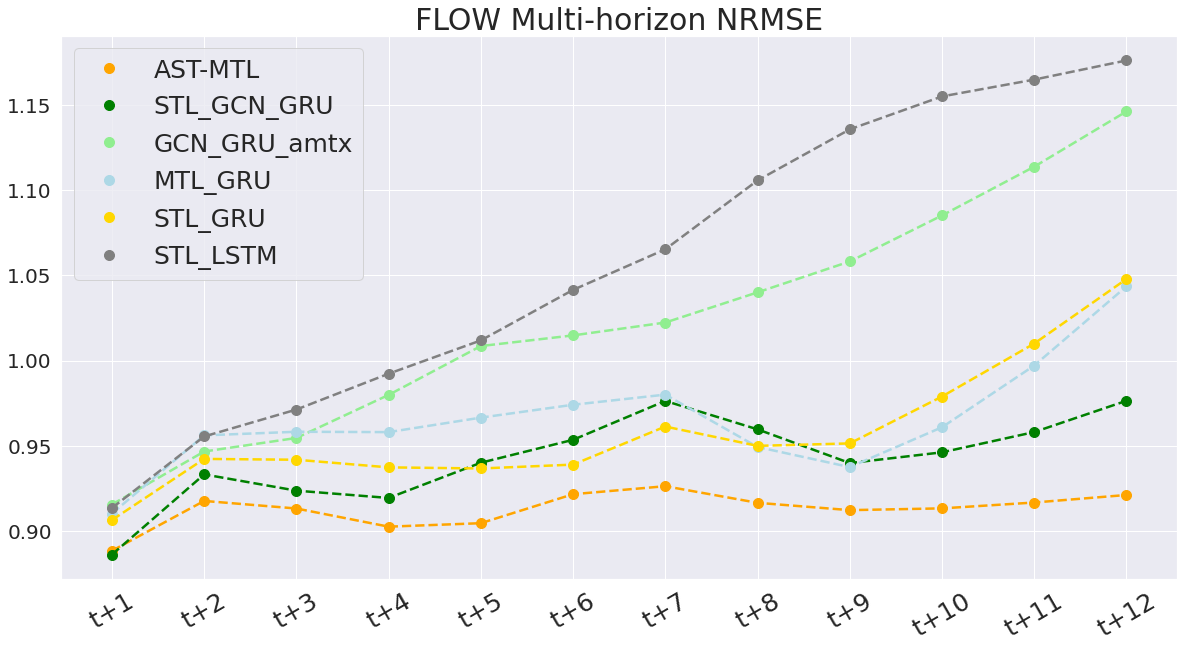

In [20]:
mean_rmse_scatter = mean_rmse.reset_index()

positions = (0,1,2,3,4,5,6,7,8,9,10,11)
labels = ('t+1', 't+2', 't+3', 't+4', 't+5', 't+6', 't+7', 't+8','t+9','t+10','t+11','t+12')


fig, ax = plt.subplots(figsize=(20, 10))

plt.plot( mean_rmse_scatter['AST-MTL'],'o', label = 'AST-MTL', c ='orange', markersize=10)
plt.plot( mean_rmse_scatter['AST-MTL'], '--', c ='orange', linewidth=2.5)

plt.plot( mean_rmse_scatter['STL_GCN_GRU'],'o', label = 'STL_GCN_GRU', c ='green', markersize=10)
plt.plot( mean_rmse_scatter['STL_GCN_GRU'], '--', c ='green', linewidth=2.5)

plt.plot( mean_rmse_scatter['GCN_GRU_augm_mtx'],'o', label = 'GCN_GRU_amtx', c ='lightgreen', markersize=10)
plt.plot( mean_rmse_scatter['GCN_GRU_augm_mtx'], '--', c ='lightgreen', linewidth=2.5)

plt.plot( mean_rmse_scatter['MTL_GRU'],'o', label = 'MTL_GRU', c ='lightblue', markersize=10)
plt.plot( mean_rmse_scatter['MTL_GRU'], '--', c ='lightblue', linewidth=2.5)

plt.plot( mean_rmse_scatter['STL_GRU'],'o', label = 'STL_GRU', c ='gold', markersize=10)
plt.plot( mean_rmse_scatter['STL_GRU'], '--', c ='gold', linewidth=2.5)

plt.plot( mean_rmse_scatter['STL_LSTM'],'o', label = 'STL_LSTM', c ='gray', markersize=10)
plt.plot( mean_rmse_scatter['STL_LSTM'], '--', c ='gray', linewidth=2.5)

plt.yticks(fontsize=20)
plt.xticks(positions, labels, fontsize=25, rotation=30)
plt.title('FLOW Multi-horizon NRMSE', fontsize=30)
ax.legend(loc='upper left', fontsize=25)
plt.savefig('flow_nrmse.png')
plt.show()


### Total MAE

In [21]:
HA_mae = np.mean(HA_mae_flow)
std_HA_mae = np.std(HA_mae_flow)

MTL_mae = np.mean(MTL_mae_flow)
std_MTL_mae = np.std(MTL_mae_flow)

STL_mae = np.mean(STL_mae_flow)
std_STL_mae = np.std(STL_mae_flow)

unique_STL_mae = np.mean(unique_STL_mae_flow)
unique_std_STL_mae = np.std(unique_STL_mae_flow)

MTL_GRU_mae = np.mean(MTL_GRU_mae_flow)
std_MTL_GRU_mae = np.std(MTL_GRU_mae_flow)

STL_GRU_mae = np.mean(STL_GRU_mae_flow)
std_STL_GRU_mae = np.std(STL_GRU_mae_flow)

STL_LSTM_mae = np.mean(STL_LSTM_mae_flow)
std_STL_LSTM_mae = np.std(STL_LSTM_mae_flow)

print(' HA MAE '+str(HA_mae)+' +-'+str(std_HA_mae))
print('')

print(' AST-MTL '+str(MTL_mae)+' +-'+str(std_MTL_mae))
print('')

print(' STL GCN GRU MAE '+str(STL_mae)+' +-'+str(std_STL_mae))
print('')

print(' GCN GRU MAE with augmented matrix '+str(unique_STL_mae)+' +-'+str(unique_std_STL_mae))
print('')

print(' MTL GRU '+str(MTL_GRU_mae)+' +-'+str(std_MTL_GRU_mae))
print('')

print(' STL GRU '+str(STL_GRU_mae)+' +-'+str(std_STL_GRU_mae))
print('')

print(' STL LSTM '+str(STL_LSTM_mae)+' +-'+str(std_STL_LSTM_mae))
print('')

 HA MAE 3.6812155 +-4.761423

 AST-MTL 3.371333054426448 +-4.418189022891738

 STL GCN GRU MAE 3.5594915812390613 +-4.7282186197459675

 GCN GRU MAE with augmented matrix 3.8237048854710878 +-5.116902106751302

 MTL GRU 3.612061364864781 +-4.896850504804791

 STL GRU 3.589127358130848 +-4.790893057282419

 STL LSTM 3.8573816668263494 +-5.306474931850579



### Multi-horizon MAE

In [22]:
HA_mae = np.mean(HA_mae_flow, axis=0).mean(axis=1)
MTL_mae = np.mean(MTL_mae_flow, axis=0).mean(axis=1)
STL_mae = np.mean(STL_mae_flow, axis=0).mean(axis=1)
unique_STL_mae = np.mean(unique_STL_mae_flow, axis=0).mean(axis=1)
MTL_GRU_mae = np.mean(MTL_GRU_mae_flow, axis=0).mean(axis=1)
STL_GRU_mae = np.mean(STL_GRU_mae_flow, axis=0).mean(axis=1)
STL_LSTM_mae = np.mean(STL_LSTM_mae_flow, axis=0).mean(axis=1)

ax = ['t+1', 't+2', 't+3', 't+4', 't+5', 't+6', 't+7', 't+8','t+9','t+10','t+11','t+12']

mean_mae = pd.DataFrame(list(zip(MTL_mae/HA_mae, STL_mae/HA_mae, unique_STL_mae/HA_mae, MTL_GRU_mae/HA_mae, STL_GRU_mae/HA_mae, STL_LSTM_mae/HA_mae)), 
               columns = ['AST-MTL', 'STL_GCN_GRU' , 'GCN_GRU_augm_mtx','MTL_GRU','STL_GRU','STL_LSTM'], index=ax)

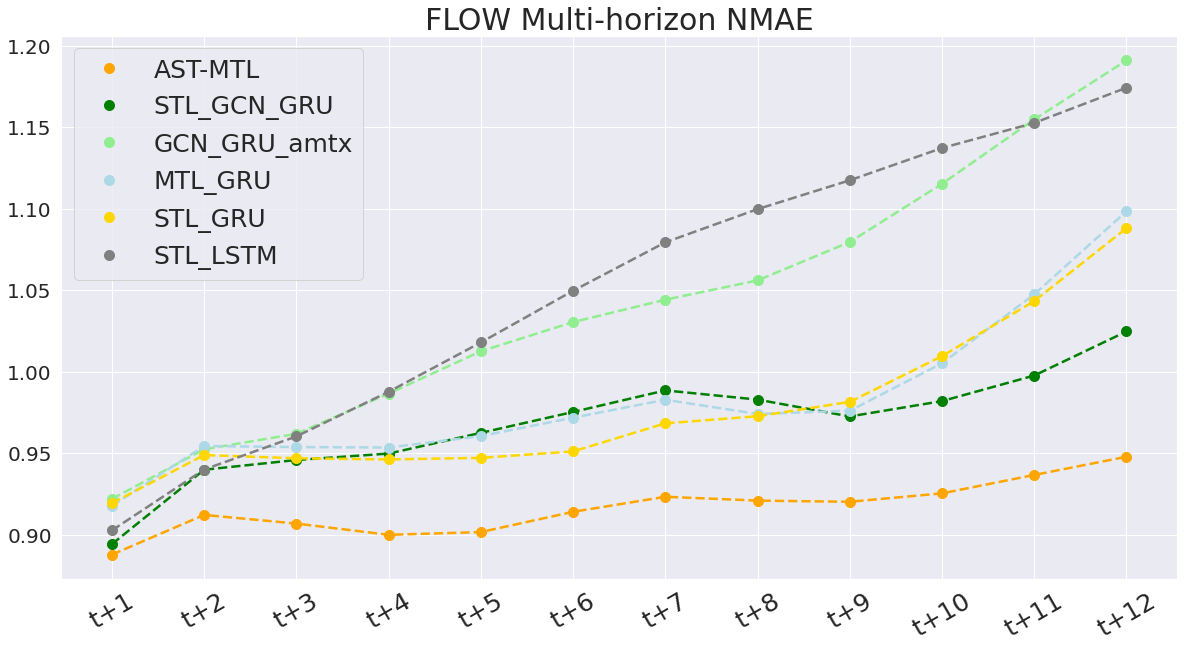

In [23]:
mean_mae_scatter = mean_mae.reset_index()

positions = (0,1,2,3,4,5,6,7,8,9,10,11)
labels = ('t+1', 't+2', 't+3', 't+4', 't+5', 't+6', 't+7', 't+8','t+9','t+10','t+11','t+12')


fig, ax = plt.subplots(figsize=(20, 10))

plt.plot( mean_mae_scatter['AST-MTL'],'o', label = 'AST-MTL', c ='orange', markersize=10)
plt.plot( mean_mae_scatter['AST-MTL'], '--', c ='orange', linewidth=2.5)

plt.plot( mean_mae_scatter['STL_GCN_GRU'],'o', label = 'STL_GCN_GRU', c ='green', markersize=10)
plt.plot( mean_mae_scatter['STL_GCN_GRU'], '--', c ='green', linewidth=2.5)

plt.plot( mean_mae_scatter['GCN_GRU_augm_mtx'],'o', label = 'GCN_GRU_amtx', c ='lightgreen', markersize=10)
plt.plot( mean_mae_scatter['GCN_GRU_augm_mtx'], '--', c ='lightgreen', linewidth=2.5)

plt.plot( mean_mae_scatter['MTL_GRU'],'o', label = 'MTL_GRU', c ='lightblue', markersize=10)
plt.plot( mean_mae_scatter['MTL_GRU'], '--', c ='lightblue', linewidth=2.5)

plt.plot( mean_mae_scatter['STL_GRU'],'o', label = 'STL_GRU', c ='gold', markersize=10)
plt.plot( mean_mae_scatter['STL_GRU'], '--', c ='gold', linewidth=2.5)

plt.plot( mean_mae_scatter['STL_LSTM'],'o', label = 'STL_LSTM', c ='gray', markersize=10)
plt.plot( mean_mae_scatter['STL_LSTM'], '--', c ='gray', linewidth=2.5)

plt.yticks(fontsize=20)
plt.xticks(positions, labels, fontsize=25, rotation=30)
plt.title('FLOW Multi-horizon NMAE', fontsize=30)
ax.legend(loc='upper left', fontsize=25)
plt.savefig('flow_nmae.png')
plt.show()


# Traffic SPEED

### Total RMSE

In [24]:
HA_rmse = np.mean(HA_rmse_vel)
std_HA_rmse = np.std(HA_rmse_vel)

MTL_rmse = np.mean(MTL_rmse_vel)
std_MTL_rmse = np.std(MTL_rmse_vel)

STL_rmse = np.mean(STL_rmse_vel)
std_STL_rmse = np.std(STL_rmse_vel)

unique_STL_rmse = np.mean(unique_STL_rmse_vel)
unique_std_STL_rmse = np.std(unique_STL_rmse_vel)

MTL_GRU_rmse = np.mean(MTL_GRU_rmse_vel)
std_MTL_GRU_rmse = np.std(MTL_GRU_rmse_vel)

STL_GRU_rmse = np.mean(STL_GRU_rmse_vel)
std_STL_GRU_rmse = np.std(STL_GRU_rmse_vel)

STL_LSTM_rmse = np.mean(STL_LSTM_rmse_vel)
std_STL_LSTM_rmse = np.std(STL_LSTM_rmse_vel)

print(' HA RMSE '+str(HA_rmse)+' +-'+str(std_HA_rmse))
print('')

print(' AST-MTL RMSE '+str(MTL_rmse)+' +-'+str(std_MTL_rmse))
print('')

print(' STL GCN GRU RMSE '+str(STL_rmse)+' +-'+str(std_STL_rmse))
print('')

print(' GCN GRU RMSE with augmented matrix '+str(unique_STL_rmse)+' +-'+str(unique_std_STL_rmse))
print('')

print(' MTL GRU RMSE '+str(MTL_GRU_rmse)+' +-'+str(std_MTL_GRU_rmse))
print('')

print(' STL GRU RMSE '+str(STL_GRU_rmse)+' +-'+str(std_STL_GRU_rmse))
print('')

print(' STL LSTM RMSE '+str(STL_LSTM_rmse)+' +-'+str(std_STL_LSTM_rmse))
print('')

 HA RMSE 18.38551 +-11.586526

 AST-MTL RMSE 16.047445122926334 +-10.60343780120835

 STL GCN GRU RMSE 16.068032311485304 +-10.608027341033939

 GCN GRU RMSE with augmented matrix 16.182173463834093 +-10.621520064120201

 MTL GRU RMSE 16.16747079243594 +-10.598141340091797

 STL GRU RMSE 16.396303777404604 +-10.733308656696643

 STL LSTM RMSE 16.260040780979157 +-10.760876922883025



### Multi-horizon RMSE

In [25]:
HA_rmse = np.mean(HA_rmse_vel, axis=0).mean(axis=1)
MTL_rmse = np.mean(MTL_rmse_vel, axis=0).mean(axis=1)
STL_rmse = np.mean(STL_rmse_vel, axis=0).mean(axis=1)
unique_STL_rmse = np.mean(unique_STL_rmse_vel, axis=0).mean(axis=1)
MTL_GRU_rmse = np.mean(MTL_GRU_rmse_vel, axis=0).mean(axis=1)
STL_GRU_rmse = np.mean(STL_GRU_rmse_vel, axis=0).mean(axis=1)
STL_LSTM_rmse = np.mean(STL_LSTM_rmse_vel, axis=0).mean(axis=1)

ax = ['t+1', 't+2', 't+3', 't+4', 't+5', 't+6', 't+7', 't+8','t+9','t+10','t+11','t+12']

mean_rmse = pd.DataFrame(list(zip(MTL_rmse/HA_rmse, STL_rmse/HA_rmse, unique_STL_rmse/HA_rmse, MTL_GRU_rmse/HA_rmse, STL_GRU_rmse/HA_rmse, STL_LSTM_rmse/HA_rmse)), 
               columns = ['AST-MTL', 'STL_GCN_GRU' , 'GCN_GRU_augm_mtx', 'MTL_GRU', 'STL_GRU', 'STL_LSTM'], index=ax)

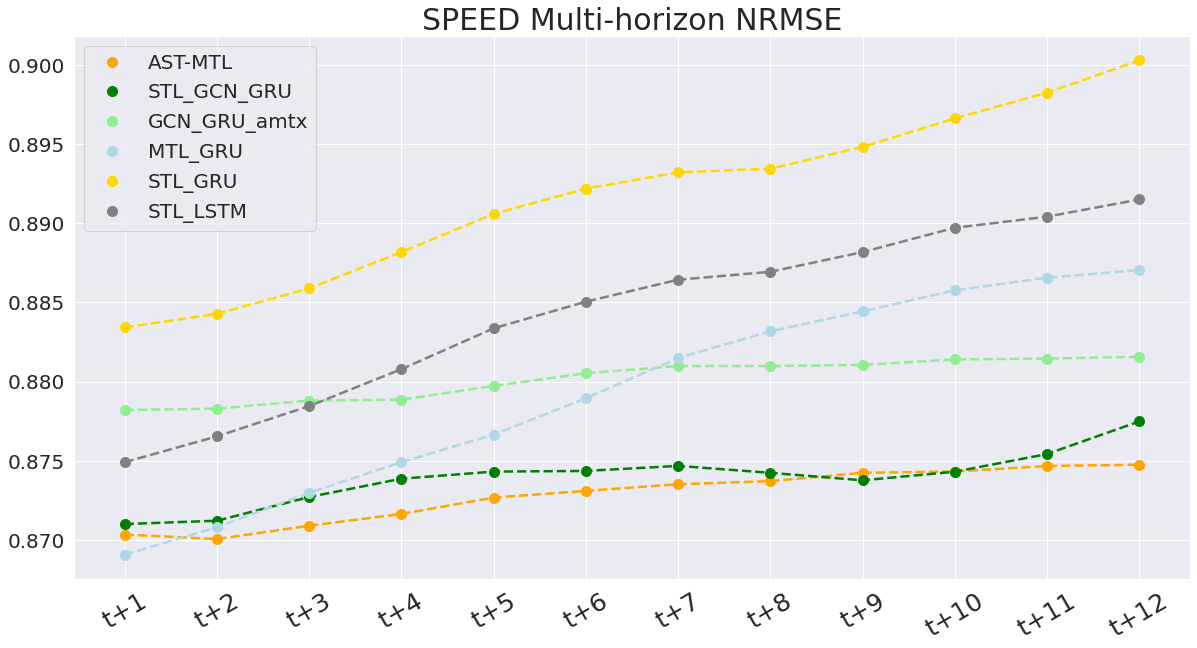

In [26]:
mean_rmse_scatter = mean_rmse.reset_index()

positions = (0,1,2,3,4,5,6,7,8,9,10,11)
labels = ('t+1', 't+2', 't+3', 't+4', 't+5', 't+6', 't+7', 't+8','t+9','t+10','t+11','t+12')


fig, ax = plt.subplots(figsize=(20, 10))

plt.plot( mean_rmse_scatter['AST-MTL'],'o', label = 'AST-MTL', c ='orange', markersize=10)
plt.plot( mean_rmse_scatter['AST-MTL'], '--', c ='orange', linewidth=2.5)

plt.plot( mean_rmse_scatter['STL_GCN_GRU'],'o', label = 'STL_GCN_GRU', c ='green', markersize=10)
plt.plot( mean_rmse_scatter['STL_GCN_GRU'], '--', c ='green', linewidth=2.5)

plt.plot( mean_rmse_scatter['GCN_GRU_augm_mtx'],'o', label = 'GCN_GRU_amtx', c ='lightgreen', markersize=10)
plt.plot( mean_rmse_scatter['GCN_GRU_augm_mtx'], '--', c ='lightgreen', linewidth=2.5)

plt.plot( mean_rmse_scatter['MTL_GRU'],'o', label = 'MTL_GRU', c ='lightblue', markersize=10)
plt.plot( mean_rmse_scatter['MTL_GRU'], '--', c ='lightblue', linewidth=2.5)

plt.plot( mean_rmse_scatter['STL_GRU'],'o', label = 'STL_GRU', c ='gold', markersize=10)
plt.plot( mean_rmse_scatter['STL_GRU'], '--', c ='gold', linewidth=2.5)

plt.plot( mean_rmse_scatter['STL_LSTM'],'o', label = 'STL_LSTM', c ='gray', markersize=10)
plt.plot( mean_rmse_scatter['STL_LSTM'], '--', c ='gray', linewidth=2.5)

plt.yticks(fontsize=20)
plt.xticks(positions, labels, fontsize=25, rotation=30)
plt.title('SPEED Multi-horizon NRMSE', fontsize=30)
ax.legend(loc='upper left', fontsize=20)
plt.savefig('vel_nrmse.png')
plt.show()


### Total MAE

In [27]:
HA_mae = np.mean(HA_mae_vel)
std_HA_mae = np.std(HA_mae_vel)

MTL_mae = np.mean(MTL_mae_vel)
std_MTL_mae = np.std(MTL_mae_vel)

STL_mae = np.mean(STL_mae_vel)
std_STL_mae = np.std(STL_mae_vel)

unique_STL_mae = np.mean(unique_STL_mae_vel)
unique_std_STL_mae = np.std(unique_STL_mae_vel)

MTL_GRU_mae = np.mean(MTL_GRU_mae_vel)
std_MTL_GRU_mae = np.std(MTL_GRU_mae_vel)

STL_GRU_mae = np.mean(STL_GRU_mae_vel)
std_STL_GRU_mae = np.std(STL_GRU_mae_vel)

STL_LSTM_mae = np.mean(STL_LSTM_mae_vel)
std_STL_LSTM_mae = np.std(STL_LSTM_mae_vel)

print(' HA MAE '+str(HA_mae)+' +-'+str(std_HA_mae))
print('')

print(' AST-MTL MAE '+str(MTL_mae)+' +-'+str(std_MTL_mae))
print('')

print(' STL GCN GRU MAE '+str(STL_mae)+' +-'+str(std_STL_mae))
print('')

print(' GCN GRU MAE with augmented matrix '+str(unique_STL_mae)+' +-'+str(unique_std_STL_mae))
print('')

print(' MTL GRU MAE '+str(MTL_GRU_mae)+' +-'+str(std_MTL_GRU_mae))
print('')

print(' STL GRU MAE '+str(STL_GRU_mae)+' +-'+str(std_STL_GRU_mae))
print('')

print(' STL LSTM MAE '+str(STL_LSTM_mae)+' +-'+str(std_STL_LSTM_mae))
print('')

 HA MAE 10.888371 +-8.256558

 AST-MTL MAE 8.587741209449975 +-6.831787978821442

 STL GCN GRU MAE 8.870973116821466 +-7.011294847875053

 GCN GRU MAE with augmented matrix 8.821169686718571 +-6.969817200214731

 MTL GRU MAE 8.956322588431657 +-6.8284008333803285

 STL GRU MAE 9.006629724575674 +-7.071328818936101

 STL LSTM MAE 8.693408765616509 +-6.9195978749368665



### Multi-horizon MAE

In [28]:
HA_mae = np.mean(HA_mae_vel, axis=0).mean(axis=1)
MTL_mae = np.mean(MTL_mae_vel, axis=0).mean(axis=1)
STL_mae = np.mean(STL_mae_vel, axis=0).mean(axis=1)
unique_STL_mae = np.mean(unique_STL_mae_vel, axis=0).mean(axis=1)
MTL_GRU_mae = np.mean(MTL_GRU_mae_vel, axis=0).mean(axis=1)
STL_GRU_mae = np.mean(STL_GRU_mae_vel, axis=0).mean(axis=1)
STL_LSTM_mae = np.mean(STL_LSTM_mae_vel, axis=0).mean(axis=1)

ax = ['t+1', 't+2', 't+3', 't+4', 't+5', 't+6', 't+7', 't+8','t+9','t+10','t+11','t+12']

mean_mae = pd.DataFrame(list(zip(MTL_mae/HA_mae, STL_mae/HA_mae, unique_STL_mae/HA_mae, MTL_GRU_mae/HA_mae, STL_GRU_mae/HA_mae, STL_LSTM_mae/HA_mae)), 
               columns = ['AST-MTL', 'STL_GCN_GRU' , 'GCN_GRU_amtx', 'MTL_GRU', 'STL_GRU', 'STL_LSTM'], index=ax)

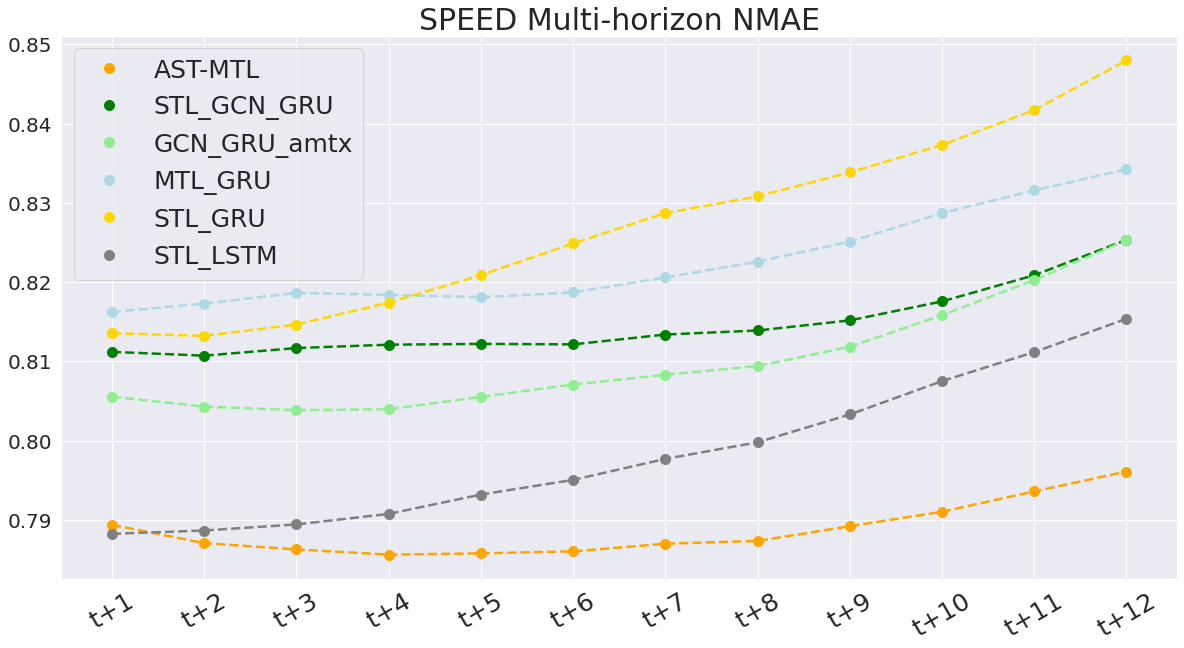

In [29]:
mean_mae_scatter = mean_mae.reset_index()

positions = (0,1,2,3,4,5,6,7,8,9,10,11)
labels = ('t+1', 't+2', 't+3', 't+4', 't+5', 't+6', 't+7', 't+8','t+9','t+10','t+11','t+12')


fig, ax = plt.subplots(figsize=(20, 10))

plt.plot( mean_mae_scatter['AST-MTL'],'o', label = 'AST-MTL', c ='orange', markersize=10)
plt.plot( mean_mae_scatter['AST-MTL'], '--', c ='orange', linewidth=2.5)

plt.plot( mean_mae_scatter['STL_GCN_GRU'],'o', label = 'STL_GCN_GRU', c ='green', markersize=10)
plt.plot( mean_mae_scatter['STL_GCN_GRU'], '--', c ='green', linewidth=2.5)

plt.plot( mean_mae_scatter['GCN_GRU_amtx'],'o', label = 'GCN_GRU_amtx', c ='lightgreen', markersize=10)
plt.plot( mean_mae_scatter['GCN_GRU_amtx'], '--', c ='lightgreen', linewidth=2.5)

plt.plot( mean_mae_scatter['MTL_GRU'],'o', label = 'MTL_GRU', c ='lightblue', markersize=10)
plt.plot( mean_mae_scatter['MTL_GRU'], '--', c ='lightblue', linewidth=2.5)

plt.plot( mean_mae_scatter['STL_GRU'],'o', label = 'STL_GRU', c ='gold', markersize=10)
plt.plot( mean_mae_scatter['STL_GRU'], '--', c ='gold', linewidth=2.5)

plt.plot( mean_mae_scatter['STL_LSTM'],'o', label = 'STL_LSTM', c ='gray', markersize=10)
plt.plot( mean_mae_scatter['STL_LSTM'], '--', c ='gray', linewidth=2.5)

plt.yticks(fontsize=20)
plt.xticks(positions, labels, fontsize=25, rotation=30)
plt.title('SPEED Multi-horizon NMAE', fontsize=30)
ax.legend(loc='upper left', fontsize=25)
plt.savefig('vel_nmae.png')
plt.show()


## STL and MTL training comparison

In [30]:
# MTL
path = '/kaggle/input/result-mtl/MTL_training.pkl'

with open(path,'rb') as f:
        train_loss_MTL = pickle.load(f)

# STL
path = '/kaggle/input/result-mtl/STL_training.pkl'

with open(path,'rb') as f:
        train_loss_STL = pickle.load(f)

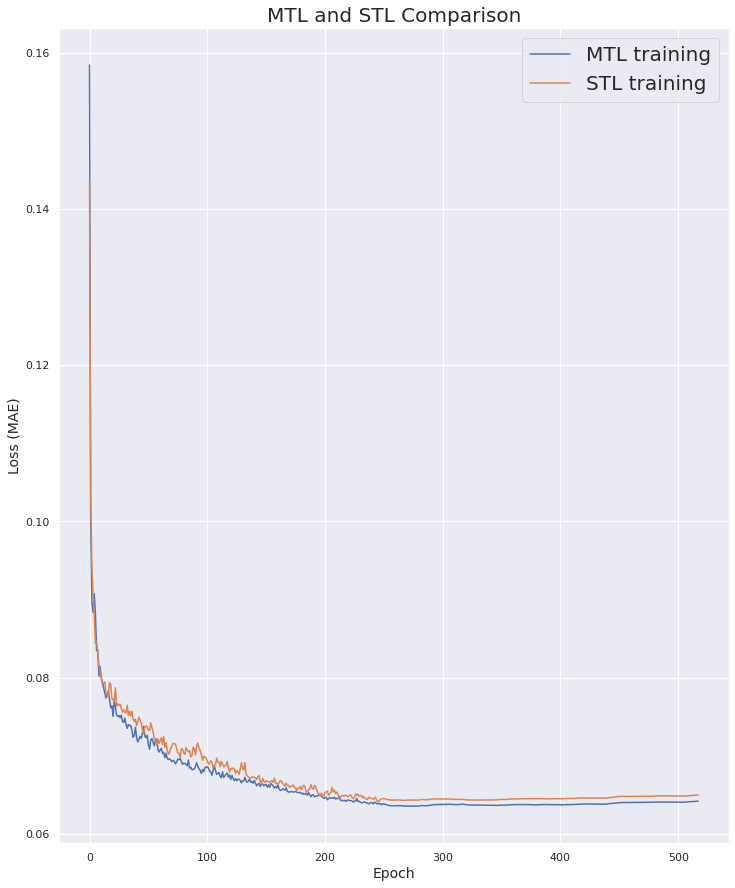

In [31]:
fig, axes = plt.subplots(1, sharex=True, figsize=(12, 15))

axes.plot(train_loss_MTL, label = 'MTL training')
axes.plot(train_loss_STL, label = 'STL training')
axes.set_ylabel("Loss (MAE)", fontsize=14)
axes.set_xlabel("Epoch", fontsize=14)
axes.legend(loc='upper right', fontsize=20)
plt.title('MTL and STL Comparison', fontsize=20)
plt.show()

## Save data for Friedman Test & Post-hoc Nemeny-Test

### FLOW-RMSE

In [32]:
list_rmse_HA = []
list_rmse_MTL = []
list_rmse_STL = []
list_rmse_augm_STL = []
list_rmse_MTL_GRU = []
list_rmse_STL_GRU = []
list_rmse_STL_LSTM = []

for rmse in HA_rmse_flow:
    list_rmse_HA.append(rmse.mean(axis=1))
    
for rmse in MTL_rmse_flow:
    list_rmse_MTL.append(rmse.mean(axis=1))
    
for rmse in STL_rmse_flow:
    list_rmse_STL.append(rmse.mean(axis=1))
    
for rmse in unique_STL_rmse_flow:
    list_rmse_augm_STL.append(rmse.mean(axis=1))
    
for rmse in MTL_GRU_rmse_flow:
    list_rmse_MTL_GRU.append(rmse.mean(axis=1))
    
for rmse in STL_GRU_rmse_flow:
    list_rmse_STL_GRU.append(rmse.mean(axis=1))
    
for rmse in STL_LSTM_rmse_flow:
    list_rmse_STL_LSTM.append(rmse.mean(axis=1))
    
matrix_rmse_HA = np.hstack(list_rmse_HA)
matrix_rmse_MTL= np.hstack(list_rmse_MTL)
matrix_rmse_STL = np.hstack(list_rmse_STL)
matrix_rmse_augm_STL = np.hstack(list_rmse_augm_STL)
matrix_rmse_MTL_GRU = np.hstack(list_rmse_MTL_GRU)
matrix_rmse_STL_GRU = np.hstack(list_rmse_STL_GRU)
matrix_rmse_STL_LSTM = np.hstack(list_rmse_STL_LSTM)

df = pd.DataFrame(np.vstack([matrix_rmse_HA, matrix_rmse_MTL, matrix_rmse_STL, matrix_rmse_augm_STL, matrix_rmse_MTL_GRU, matrix_rmse_STL_GRU, matrix_rmse_STL_LSTM]).transpose())
df.head()

df.to_csv('df_FLOW_RMSE.csv')

### SPEED-RMSE

In [33]:
list_rmse_HA = []
list_rmse_MTL = []
list_rmse_STL = []
list_rmse_augm_STL = []
list_rmse_MTL_GRU = []
list_rmse_STL_GRU = []
list_rmse_STL_LSTM = []

for rmse in HA_rmse_vel:
    list_rmse_HA.append(rmse.mean(axis=1))
    
for rmse in MTL_rmse_vel:
    list_rmse_MTL.append(rmse.mean(axis=1))
    
for rmse in STL_rmse_vel:
    list_rmse_STL.append(rmse.mean(axis=1))
    
for rmse in unique_STL_rmse_vel:
    list_rmse_augm_STL.append(rmse.mean(axis=1))
    
for rmse in MTL_GRU_rmse_vel:
    list_rmse_MTL_GRU.append(rmse.mean(axis=1))
    
for rmse in STL_GRU_rmse_vel:
    list_rmse_STL_GRU.append(rmse.mean(axis=1))
    
for rmse in STL_LSTM_rmse_vel:
    list_rmse_STL_LSTM.append(rmse.mean(axis=1))
    
matrix_rmse_HA = np.hstack(list_rmse_HA)
matrix_rmse_MTL= np.hstack(list_rmse_MTL)
matrix_rmse_STL = np.hstack(list_rmse_STL)
matrix_rmse_augm_STL = np.hstack(list_rmse_augm_STL)
matrix_rmse_MTL_GRU = np.hstack(list_rmse_MTL_GRU)
matrix_rmse_STL_GRU = np.hstack(list_rmse_STL_GRU)
matrix_rmse_STL_LSTM = np.hstack(list_rmse_STL_LSTM)

df = pd.DataFrame(np.vstack([matrix_rmse_HA, matrix_rmse_MTL, matrix_rmse_STL, matrix_rmse_augm_STL, matrix_rmse_MTL_GRU, matrix_rmse_STL_GRU, matrix_rmse_STL_LSTM]).transpose())
df.head()

df.to_csv('df_VEL_RMSE.csv')

### FLOW-MAE

In [34]:
list_mae_HA = []
list_mae_MTL = []
list_mae_STL = []
list_mae_augm_STL = []
list_mae_MTL_GRU = []
list_mae_STL_GRU = []
list_mae_STL_LSTM = []

for mae in HA_mae_flow:
    list_mae_HA.append(mae.mean(axis=1))
    
for mae in MTL_mae_flow:
    list_mae_MTL.append(mae.mean(axis=1))
    
for mae in STL_mae_flow:
    list_mae_STL.append(mae.mean(axis=1))
    
for mae in unique_STL_mae_flow:
    list_mae_augm_STL.append(mae.mean(axis=1))
    
for mae in MTL_GRU_mae_flow:
    list_mae_MTL_GRU.append(mae.mean(axis=1))
    
for mae in STL_GRU_mae_flow:
    list_mae_STL_GRU.append(mae.mean(axis=1))
    
for mae in STL_LSTM_mae_flow:
    list_mae_STL_LSTM.append(mae.mean(axis=1))

matrix_mae_HA = np.hstack(list_mae_HA)
matrix_mae_MTL= np.hstack(list_mae_MTL)
matrix_mae_STL = np.hstack(list_mae_STL)
matrix_mae_augm_STL = np.hstack(list_mae_augm_STL)
matrix_mae_MTL_GRU = np.hstack(list_mae_MTL_GRU )
matrix_mae_STL_GRU = np.hstack(list_mae_STL_GRU )
matrix_mae_STL_LSTM = np.hstack(list_mae_STL_LSTM )

df = pd.DataFrame(np.vstack([matrix_mae_HA, matrix_mae_MTL, matrix_mae_STL, matrix_mae_augm_STL, matrix_mae_MTL_GRU, matrix_mae_STL_GRU, matrix_mae_STL_LSTM]).transpose())
df.head()

df.to_csv('df_FLOW_MAE.csv')

### SPEED-MAE

In [35]:
list_mae_HA = []
list_mae_MTL = []
list_mae_STL = []
list_mae_augm_STL = []
list_mae_MTL_GRU = []
list_mae_STL_GRU = []
list_mae_STL_LSTM = []

for mae in HA_mae_vel:
    list_mae_HA.append(mae.mean(axis=1))
    
for mae in MTL_mae_vel:
    list_mae_MTL.append(mae.mean(axis=1))
    
for mae in STL_mae_vel:
    list_mae_STL.append(mae.mean(axis=1))
    
for mae in unique_STL_mae_vel:
    list_mae_augm_STL.append(mae.mean(axis=1))
    
for mae in MTL_GRU_mae_vel:
    list_mae_MTL_GRU.append(mae.mean(axis=1))
    
for mae in STL_GRU_mae_vel:
    list_mae_STL_GRU.append(mae.mean(axis=1))
    
for mae in STL_LSTM_mae_vel:
    list_mae_STL_LSTM.append(mae.mean(axis=1))
    
matrix_mae_HA= np.hstack(list_mae_HA)
matrix_mae_MTL= np.hstack(list_mae_MTL)
matrix_mae_STL = np.hstack(list_mae_STL)
matrix_mae_augm_STL = np.hstack(list_mae_augm_STL)
matrix_mae_MTL_GRU = np.hstack(list_mae_MTL_GRU)
matrix_mae_STL_GRU = np.hstack(list_mae_STL_GRU)
matrix_mae_STL_LSTM = np.hstack(list_mae_STL_LSTM)

df = pd.DataFrame(np.vstack([matrix_mae_HA, matrix_mae_MTL, matrix_mae_STL, matrix_mae_augm_STL, matrix_mae_MTL_GRU, matrix_mae_STL_GRU, matrix_mae_STL_LSTM]).transpose())
df.head()

df.to_csv('df_VEL_MAE.csv')

# Sensitivity Analysis

In [36]:
# MTL GCN GRU model (Best model based on attention)

# rmse
path = '/kaggle/input/result-mtl/MTL_GCN_GRU_RMSE.pkl'

with open(path,'rb') as f:
        rmse_list = pickle.load(f)

# mae
path = '/kaggle/input/result-mtl/MTL_GCN_GRU_MAE.pkl'

with open(path,'rb') as f:
        mae_list = pickle.load(f)

In [37]:
MTL_rmse_flow = [rmse[:,:5795] for i, rmse in enumerate(rmse_list)]
MTL_rmse_vel = [rmse[:,5795:] for i, rmse in enumerate(rmse_list)]

MTL_mae_flow = [mae[:,:5795] for i, mae in enumerate(mae_list)]
MTL_mae_vel = [mae[:,5795:] for i, mae in enumerate(mae_list)]

In [38]:
# no Dense

# rmse
path = '/kaggle/input/result-mtl/noDense_RMSE.pkl'

with open(path,'rb') as f:
        rmse_list = pickle.load(f)

# mae
path = '/kaggle/input/result-mtl/noDense_MAE.pkl'

with open(path,'rb') as f:
        mae_list = pickle.load(f)

In [39]:
noDense_rmse_flow = [rmse[:,:5795] for i, rmse in enumerate(rmse_list)]
noDense_rmse_vel = [rmse[:,5795:] for i, rmse in enumerate(rmse_list)]

noDense_mae_flow = [mae[:,:5795] for i, mae in enumerate(mae_list)]
noDense_mae_vel = [mae[:,5795:] for i, mae in enumerate(mae_list)]

In [40]:
# no Attention

# rmse
path = '/kaggle/input/result-mtl/noAtt_RMSE.pkl'

with open(path,'rb') as f:
        rmse_list = pickle.load(f)

# mae
path = '/kaggle/input/result-mtl/noAtt_MAE.pkl'

with open(path,'rb') as f:
        mae_list = pickle.load(f)

In [41]:
noAtt_rmse_flow = [rmse[:,:5795] for i, rmse in enumerate(rmse_list)]
noAtt_rmse_vel = [rmse[:,5795:] for i, rmse in enumerate(rmse_list)]

noAtt_mae_flow = [mae[:,:5795] for i, mae in enumerate(mae_list)]
noAtt_mae_vel = [mae[:,5795:] for i, mae in enumerate(mae_list)]

In [42]:
# no GCN

# rmse
path = '/kaggle/input/result-mtl/noGCN_RMSE.pkl'

with open(path,'rb') as f:
        rmse_list = pickle.load(f)

# mae
path = '/kaggle/input/result-mtl/noGCN_MAE.pkl'

with open(path,'rb') as f:
        mae_list = pickle.load(f)

In [43]:
noGCN_rmse_flow = [rmse[:,:5795] for i, rmse in enumerate(rmse_list)]
noGCN_rmse_vel = [rmse[:,5795:] for i, rmse in enumerate(rmse_list)]

noGCN_mae_flow = [mae[:,:5795] for i, mae in enumerate(mae_list)]
noGCN_mae_vel = [mae[:,5795:] for i, mae in enumerate(mae_list)]

In [44]:
# no Add

# rmse
path = '/kaggle/input/result-mtl/noAdd_RMSE.pkl'

with open(path,'rb') as f:
        rmse_list = pickle.load(f)

# mae
path = '/kaggle/input/result-mtl/noAdd_MAE.pkl'

with open(path,'rb') as f:
        mae_list = pickle.load(f)

In [45]:
noAdd_rmse_flow = [rmse[:,:5795] for i, rmse in enumerate(rmse_list)]
noAdd_rmse_vel = [rmse[:,5795:] for i, rmse in enumerate(rmse_list)]

noAdd_mae_flow = [mae[:,:5795] for i, mae in enumerate(mae_list)]
noAdd_mae_vel = [mae[:,5795:] for i, mae in enumerate(mae_list)]

In [46]:
MTL_rmse_flow = round(np.mean(MTL_rmse_flow),2)
MTL_rmse_vel = round(np.mean(MTL_rmse_vel),2)
MTL_mae_flow = round(np.mean(MTL_mae_flow),2)
MTL_mae_vel = round(np.mean(MTL_mae_vel),2)

noDense_rmse_flow = round(np.mean(noDense_rmse_flow),2)
noDense_rmse_vel = round(np.mean(noDense_rmse_vel),2)
noDense_mae_flow = round(np.mean(noDense_mae_flow),2)
noDense_mae_vel = round(np.mean(noDense_mae_vel),2)

noAtt_rmse_flow = round(np.mean(noAtt_rmse_flow),2)
noAtt_rmse_vel = round(np.mean(noAtt_rmse_vel),2)
noAtt_mae_flow = round(np.mean(noAtt_mae_flow),2)
noAtt_mae_vel = round(np.mean(noAtt_mae_vel),2)

noGCN_rmse_flow = round(np.mean(noGCN_rmse_flow),2)
noGCN_rmse_vel = round(np.mean(noGCN_rmse_vel),2)
noGCN_mae_flow = round(np.mean(noGCN_mae_flow),2)
noGCN_mae_vel = round(np.mean(noGCN_mae_vel),2)

noAdd_rmse_flow = round(np.mean(noAdd_rmse_flow),2)
noAdd_rmse_vel = round(np.mean(noAdd_rmse_vel),2)
noAdd_mae_flow = round(np.mean(noAdd_mae_flow),2)
noAdd_mae_vel = round(np.mean(noAdd_mae_vel),2)

In [47]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 3, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

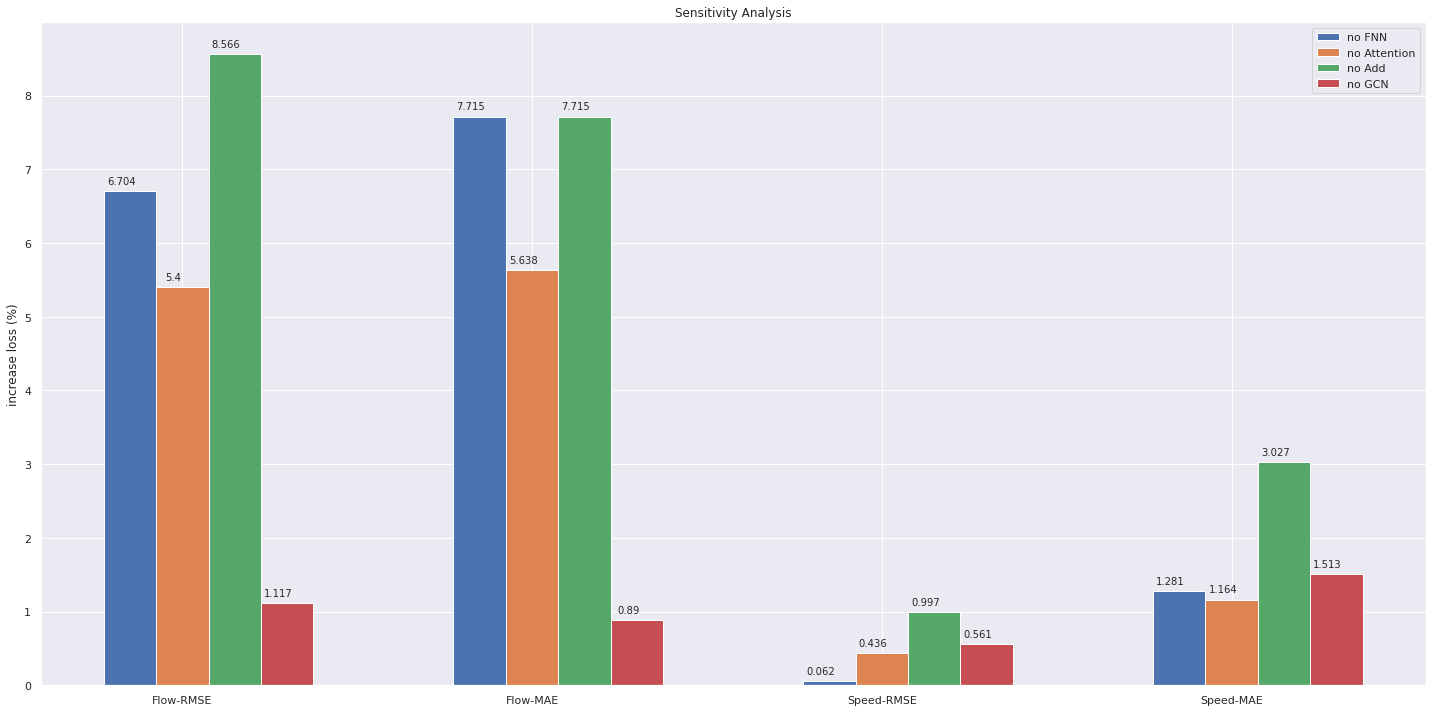

In [48]:
labels = ['Flow-RMSE',  'Flow-MAE', 'Speed-RMSE', 'Speed-MAE']

list_AST_MTL = [MTL_rmse_flow,  MTL_mae_flow, MTL_rmse_vel, MTL_mae_vel ]
list_noDense = [noDense_rmse_flow,  noDense_mae_flow, noDense_rmse_vel, noDense_mae_vel]
list_noAtt = [noAtt_rmse_flow,  noAtt_mae_flow, noAtt_rmse_vel, noAtt_mae_vel]
list_noGCN = [noGCN_rmse_flow,  noGCN_mae_flow, noGCN_rmse_vel, noGCN_mae_vel]
list_noAdd = [noAdd_rmse_flow,  noAdd_mae_flow, noAdd_rmse_vel, noAdd_mae_vel]

perc_noDense = [round(i/j*100-100,3) for i, j in zip(list_noDense, list_AST_MTL)]
perc_noAtt = [round(i/j*100-100,3) for i, j in zip(list_noAtt, list_AST_MTL)]
perc_noGCN = [round(i/j*100-100,3) for i, j in zip(list_noGCN, list_AST_MTL)]
perc_noAdd = [round(i/j*100-100,3) for i, j in zip(list_noAdd, list_AST_MTL)]

x = np.arange(len(labels))
width = 0.15


fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width, perc_noDense, width, label='no FNN')
rects2 = ax.bar(x , perc_noAtt, width, label='no Attention')
rects3 = ax.bar(x + width, perc_noAdd, width, label='no Add')
rects4 = ax.bar(x + 2*width, perc_noGCN, width, label='no GCN')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('increase loss (%)')
ax.set_title('Sensitivity Analysis')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)


fig.tight_layout()

plt.show()

